In [ ]:
seq = 'AGTC'
import random
random.choice('ACGT')

In [ ]:
random.choice('ACGT')

In [ ]:
#generate a random sequence
seq = ''
for _ in range(10):
    seq +=random.choice('ACGT')
print(seq)
len(seq)

In [10]:
# find the longest gene prefix
def longestCommonPrefix (s1,s2):
    i=0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]
    return s2[:i]
longestCommonPrefix('ATTGA','ATTGG')

'ATTG'

In [18]:
# To test whether two strengths are identical
def match(s1,s2):
    i = 0 
    if len(s1) == len(s2):
        if i < len(s1) and i < len(s2) and s1[i] == s2[i]:
            i += 1
            print('matched')
        else:
            print('not match')
    else:
        print('not match')
match('ATCGC','ATCGC')

matched


In [19]:
complement = {'A','T','G','C','T','A','C','G'}

In [1]:
def reverse(s):
    t = ''
    complement = {'A':'T','G':'C','T':'A','C':'G'}
    for base in s:
        t += complement[base]
    print(t)
reverse('ATCGTG')

TAGCAC


In [2]:
!wget  --no-check http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

/bin/sh: wget: command not found


In [6]:
import os

os.chdir('/Users/xiangyijin/Desktop/genetics/')
os.getcwd()

'/Users/xiangyijin/Desktop/genetics'

In [39]:
#Create function to read in the fa format data (put line by line data into a string)
def readGenome(filename):
    output = ''
    with open(filename,'r') as f: #'r'represents read only while 'w' represents write 
        for line in f:
            if line[0] != '>':
                output += line.rstrip()
    return output
genome = readGenome('lambda_virus.fa')

In [42]:
genome[:100]
len(genome)

48502

In [56]:
# Use a dictionary to  count the count of each base
dic = {'A': 0, 'C' : 0, 'G' : 0, 'T' : 0}
for base in genome:
    dic[base] += 1 
print(dic)


{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [57]:
# a function in package collections could help to calculate the count of bases
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [58]:
r

/bin/sh: wget: command not found


In [5]:
os.getcwd()


NameError: name 'os' is not defined

In [19]:
#Create a function to readin fastq format document

def readFastq(filename):
    sequence = []
    quality = []
    with open(filename) as fh:
        while True:
            fh.readline() #skip the frist line for the description
            seq = fh.readline().rstrip() #store the sequence information of the second line, and rstrip here is used to remove the '/n'at the end of each strands
            fh.readline() #skip the third line for the + line
            qual = fh.readline().rstrip() #srore the quality information of the fourth line
            if len(seq) == 0:
                break
            sequence.append(seq)
            quality.append(qual)
    return sequence,quality
    

In [20]:
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [23]:
seqs[:5]


['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']

In [10]:
# Function made to change the ASCII format quality to integer number
def qualitychange(qual):
    return ord(qual)-33

In [11]:
qualitychange('#')


2

In [12]:
#Function for 
def creatHist(qualitySrtings):
    hist = [0] * 50
    for qual in qualitySrtings:
        for phred in qual:
            q = qualitychange(phred)
            hist[q] += 1 #add 1 to the hist[q]
    return hist
h = creatHist(quals)
print(h) 

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


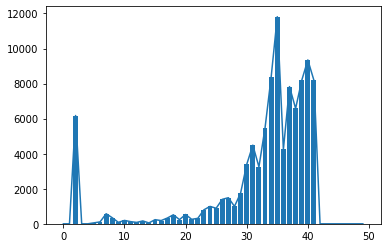

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.plot(range(len(h)),h)
plt.show()



In [49]:
def findGCByPos(reads):
    gccount = [0] * 100
    totalcount = [0] * 100
    gcprop =[0]*100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gccount[i] += 1
            totalcount[i] += 1
        for i in range(len(gccount)):
            if totalcount[i] > 0:
                gcprop[i] = gccount[i]/ float(totalcount[i])
    return gcprop
                
    

In [50]:
gcprop = findGCByPos(seqs)


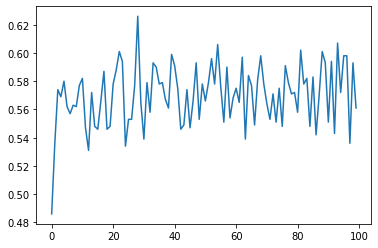

In [51]:
plt.plot(range(len(gcprop)),gcprop)
plt.show()

In [56]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count #N is basically when the base caller has no confidence 

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

In [104]:
#Create function to read in the fa format data (put line by line data into a string)
def readGenome(filename):
    output = ''
    with open(filename,'r') as f: #'r'represents read only while 'w' represents write 
        for line in f:
            if line[0] != '>':
                output += line.rstrip()
    return output
genome = readGenome('phix.fa')

In [86]:
def naive(p,t): #p represents pattern and t reprosents the one to be compared
    site = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            site.append(i)
    return site
            

In [64]:
#test
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [65]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [68]:
#Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [78]:
# Matching real reads

def readFastq(filename):
    sequence = []
    with open(filename) as fh:
        while True:
            fh.readline() #skip the frist line for the description
            seq = fh.readline().rstrip() #store the sequence information of the second line, and rstrip here is used to remove the '/n'at the end of each strands
            fh.readline() #skip the third line for the + line
            fh.readline() #skip the forth line for the quality
            if len(seq) == 0:
                break
            sequence.append(seq)
    return sequence
phix_reads = readFastq('ERR266411_1.first1000.fastq')
phix_reads[:5]

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC']

In [82]:
import collections
phix_reads = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})

In [89]:
# Calulate match in data fastq
n = 0
nummatched = 0
for read in phix_reads:
    matched = naive(read, genome)
    n += 1
    if len(matched) > 0:
        nummatched += 1
print ('%d / %d reads matched the genome exactly'% (nummatched, n))


7 / 1000 reads matched the genome exactly


In [101]:
#match and match reversed reads
def reverse(s):
    t = ''
    complement = {'A':'T','G':'C','T':'A','C':'G','N':'N'}
    for base in s:
        t = complement[base] + t
    return t

    


In [102]:
nummatched = 0
n = 0
for read in phix_reads:
    read = read[:30]  # just taking the first 30 bases
    matched = naive(read, genome)
    matched.extend(naive(reverse(read), genome))
    n += 1
    if len(matched) > 0:
        nummatched += 1
print('%d / %d reads matched the genome exactly!' % (nummatched, n))

932 / 1000 reads matched the genome exactly!


932 / 1000 reads matched the genome exactly!
